# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from sklearn.ensemble import IsolationForest

# Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
ev= pd.read_csv('C:\\Users\\Himani\\Desktop\\pp/big.csv')

In [3]:
# print first 5 rows in the dataframe
ev.head()

,id,clusterId,connectionTime,Num.Rep.,disconnectTime,donechargingTime,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,...,userID,userInput,Precip Type,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
0,5bc90cb9f9af8b0d7fe77cd2,39,"Wed, 25 Apr 2018 11:08:04 GMT",11.13,"Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",2.20,3.55,7.93,6.44,...,NaN,NaN,rain,24.37,34.85,13.54,300,9.9,0,1004.55
1,5bc90cb9f9af8b0d7fe77cd3,39,"Wed, 25 Apr 2018 13:45:10 GMT",13.75,"Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",11.19,3.55,10.01,6.44,...,NaN,NaN,rain,24.37,34.85,13.54,300,9.9,0,1004.55
2,5bc90cb9f9af8b0d7fe77cd4,39,"Wed, 25 Apr 2018 13:45:50 GMT",13.76,"Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",10.33,3.54,5.26,6.44,...,NaN,NaN,rain,24.37,34.85,13.54,300,9.9,0,1004.55
3,5bc90cb9f9af8b0d7fe77cd5,39,"Wed, 25 Apr 2018 14:37:06 GMT",14.62,"Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",9.31,3.55,5.18,6.44,...,NaN,NaN,rain,24.37,34.85,13.54,300,9.9,0,1004.55
4,5bc90cb9f9af8b0d7fe77cd6,39,"Wed, 25 Apr 2018 14:40:34 GMT",14.68,"Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",8.38,3.55,10.12,6.44,...,NaN,NaN,rain,24.37,34.85,13.54,300,9.9,0,1004.55


In [4]:
# print last 5 rows of the dataframe
ev.tail()

,id,clusterId,connectionTime,Num.Rep.,disconnectTime,donechargingTime,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,...,userID,userInput,Precip Type,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
1194,9543932,39,0015-08-03 16:45:16,16.0,0015-08-03 19:58:16,0015-08-03 19:58:16,3.22,2.57,1.82,3.62,...,NaN,NaN,rain,35.98,40.55,10.35,305,16.1,0,1005.18
1195,9851741,39,0015-08-04 19:00:42,19.0,0015-08-04 20:31:07,0015-08-04 20:31:07,1.51,2.41,4.73,4.07,...,NaN,NaN,rain,35.98,40.55,10.35,305,16.1,0,1005.18
1196,4852971,39,0015-08-05 12:18:20,12.0,0015-08-05 15:35:08,0015-08-05 15:35:08,3.28,2.70,3.69,3.85,...,NaN,NaN,rain,35.98,40.55,10.35,305,17.3,0,1005.18
1197,6431779,39,0015-08-06 13:53:58,13.0,0015-08-06 15:47:07,0015-08-06 15:47:07,1.89,2.42,3.82,3.93,...,NaN,NaN,rain,35.98,40.55,10.35,305,17.3,0,1005.18
1198,7870286,39,0015-08-07 12:05:16,12.0,0015-08-07 15:02:08,0015-08-07 15:02:08,2.95,2.95,4.03,4.03,...,NaN,NaN,rain,35.98,40.55,10.35,305,17.3,0,1005.18


In [5]:
# number of rows and columns
ev.shape

(1199, 25)

In [6]:
# getting some basic informations about the data
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1199 non-null   object 
 1   clusterId              1199 non-null   int64  
 2   connectionTime         1199 non-null   object 
 3   Num.Rep.               1199 non-null   float64
 4   disconnectTime         1199 non-null   object 
 5   donechargingTime       1198 non-null   object 
 6   SessionLength          1199 non-null   float64
 7   Avg.Sess.              1199 non-null   float64
 8   kWhDelivered           1199 non-null   float64
 9   Avg.Cons.              1199 non-null   float64
 10  sessionId              1199 non-null   object 
 11  siteId                 1199 non-null   int64  
 12  spaceID                1199 non-null   object 
 13  stationID              1199 non-null   object 
 14  timezone               1199 non-null   object 
 15  user

In [7]:
# checking the number of missing values
ev.isnull().sum()

id                          0
clusterId                   0
connectionTime              0
Num.Rep.                    0
disconnectTime              0
donechargingTime            1
SessionLength               0
Avg.Sess.                   0
kWhDelivered                0
Avg.Cons.                   0
sessionId                   0
siteId                      0
spaceID                     0
stationID                   0
timezone                    0
userID                   1199
userInput                1199
Precip Type                 0
temperature                 0
Avg. Humidity               0
Avg Wind Speed(mph)         0
Wind Bearing(degrees)       0
Visibility(km)              0
Loud Cover                  0
Pressure(millibar)          0
dtype: int64

In [8]:
ev["donechargingTime"] = ev["donechargingTime"].fillna(ev["donechargingTime"].mode()[0])

In [9]:
NAs = pd.concat([ev.isnull().sum()], axis=1, keys=["EV"])
NAs[NAs.sum(axis=1) > 0]

,EV
userID,1199
userInput,1199


In [10]:
ev.pop("userID")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userID, Length: 1199, dtype: float64

In [11]:
ev.pop("userInput")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userInput, Length: 1199, dtype: float64

#How does data look matematically

In [12]:
ev.describe()

,clusterId,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
count,1199.0,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.0,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.0,1199.000000
mean,39.0,14.840467,3.546372,2.895396,6.443036,5.465263,2.0,30.840901,39.845421,12.729166,188.645538,14.790342,0.0,1007.787873
std,0.0,4.004081,2.867130,0.223573,4.871629,0.605820,0.0,3.311170,3.334805,1.836852,98.281920,2.129531,0.0,3.449437
min,39.0,0.040000,0.010000,2.410000,0.000000,3.620000,2.0,24.370000,33.840000,10.240000,10.000000,9.900000,0.0,1003.100000
25%,39.0,12.000000,2.130000,2.750000,3.700000,4.920000,2.0,28.510000,37.565000,11.040000,120.000000,14.170000,0.0,1005.180000
50%,39.0,16.000000,3.010000,2.830000,5.790000,5.590000,2.0,31.660000,39.380000,12.490000,195.000000,15.730000,0.0,1006.920000
75%,39.0,17.000000,3.965000,2.930000,6.975000,5.810000,2.0,33.550000,42.950000,14.780000,271.000000,16.100000,0.0,1008.450000
max,39.0,23.900000,55.240000,3.550000,47.810000,6.450000,2.0,35.980000,45.100000,15.640000,339.000000,17.300000,0.0,1016.850000


In [13]:
#Are there duplicate values
ev.duplicated().sum()

0

In [14]:
#How is the correlation between columns
ev.corr()

C:\Users\Himani\AppData\Local\Temp\ipykernel_19028\4186223021.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ev.corr()


,clusterId,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
clusterId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num.Rep.,NaN,1.000000,-0.071010,-0.107489,-0.130661,-0.040154,NaN,-0.005883,0.000890,0.082359,-0.102735,-0.177679,NaN,-0.118644
SessionLength,NaN,-0.071010,1.000000,0.380336,0.349359,0.288598,NaN,-0.315319,-0.303165,-0.081812,0.114141,0.003940,NaN,0.259002
Avg.Sess.,NaN,-0.107489,0.380336,1.000000,0.227223,0.773066,NaN,-0.835803,-0.863568,-0.266609,0.276224,-0.143602,NaN,0.485590
kWhDelivered,NaN,-0.130661,0.349359,0.227223,1.000000,0.231452,NaN,-0.262378,-0.233600,-0.025725,-0.099936,0.078063,NaN,0.249317
Avg.Cons.,NaN,-0.040154,0.288598,0.773066,0.231452,1.000000,NaN,-0.698765,-0.849067,-0.548857,0.087399,-0.116635,NaN,0.415482
siteId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,NaN,-0.005883,-0.315319,-0.835803,-0.262378,-0.698765,NaN,1.000000,0.850414,0.100510,-0.046195,0.259534,NaN,-0.574374
Avg. Humidity,NaN,0.000890,-0.303165,-0.863568,-0.233600,-0.849067,NaN,0.850414,1.000000,0.396623,-0.181635,0.109862,NaN,-0.507359
Avg Wind Speed(mph),NaN,0.082359,-0.081812,-0.266609,-0.025725,-0.548857,NaN,0.100510,0.396623,1.000000,-0.256970,-0.121604,NaN,-0.133499


In [15]:
correlation = ev.corr()

C:\Users\Himani\AppData\Local\Temp\ipykernel_19028\1113734809.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ev.corr()


<Axes: >

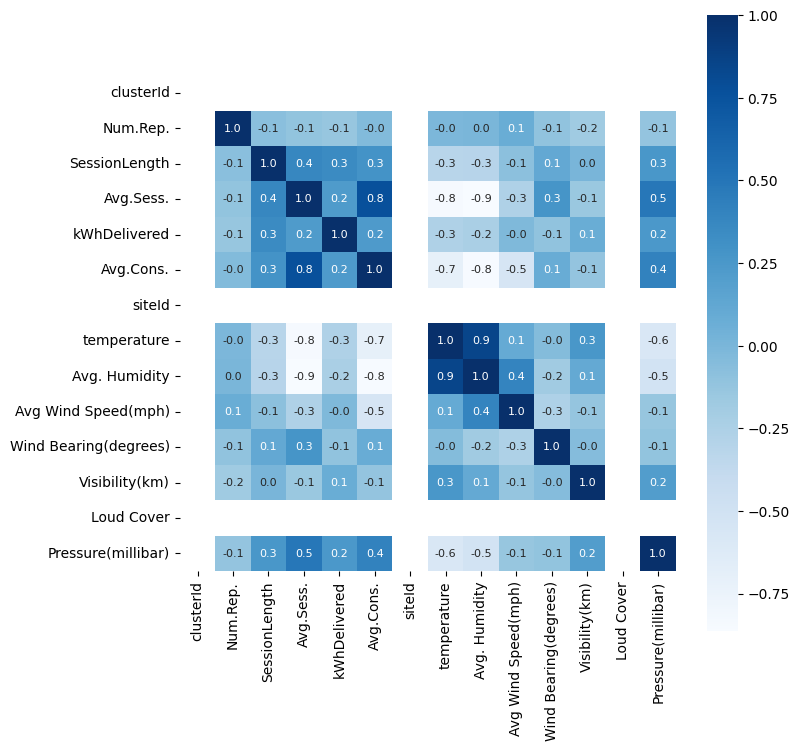

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
print(correlation['SessionLength'])

clusterId                     NaN
Num.Rep.                -0.071010
SessionLength            1.000000
Avg.Sess.                0.380336
kWhDelivered             0.349359
Avg.Cons.                0.288598
siteId                        NaN
temperature             -0.315319
Avg. Humidity           -0.303165
Avg Wind Speed(mph)     -0.081812
Wind Bearing(degrees)    0.114141
Visibility(km)           0.003940
Loud Cover                    NaN
Pressure(millibar)       0.259002
Name: SessionLength, dtype: float64


C:\Users\Himani\AppData\Local\Temp\ipykernel_19028\3026985986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev['SessionLength'],color='green')


<Axes: xlabel='SessionLength', ylabel='Density'>

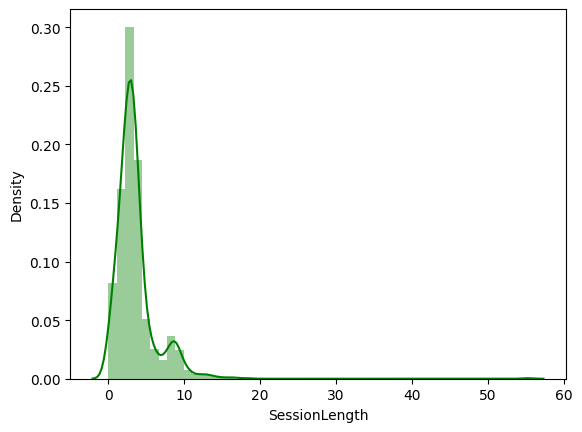

In [18]:
sns.distplot(ev['SessionLength'],color='green')

In [19]:
print(correlation['kWhDelivered'])

clusterId                     NaN
Num.Rep.                -0.130661
SessionLength            0.349359
Avg.Sess.                0.227223
kWhDelivered             1.000000
Avg.Cons.                0.231452
siteId                        NaN
temperature             -0.262378
Avg. Humidity           -0.233600
Avg Wind Speed(mph)     -0.025725
Wind Bearing(degrees)   -0.099936
Visibility(km)           0.078063
Loud Cover                    NaN
Pressure(millibar)       0.249317
Name: kWhDelivered, dtype: float64


In [20]:
ev.drop(['id','clusterId','connectionTime','sessionId','spaceID','stationID','disconnectTime','siteId','donechargingTime','timezone','Precip Type','Loud Cover'],axis=1,inplace=True)

<Axes: >

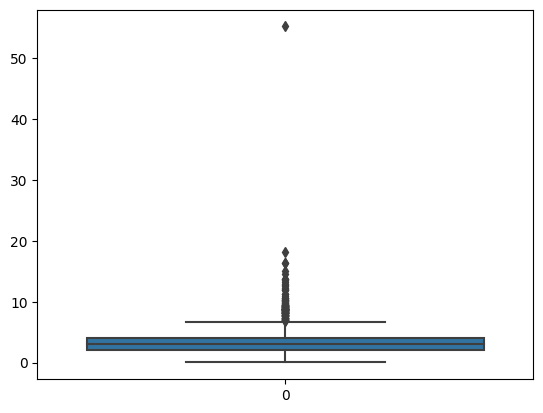

In [21]:
#Boxplot
sns.boxplot(ev['SessionLength'])

In [22]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.04,max_features=1.0)
model.fit(ev[['SessionLength']])

C:\Users\Himani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.04)

In [23]:
ev['newlength']=model.decision_function(ev[['SessionLength']])
ev['anomaly']=model.predict(ev[['SessionLength']])
ev.head(10)

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),newlength,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.184363,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,-0.084677,-1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,-0.037690,-1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.046229,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.048180,1
5,14.73,10.56,3.54,7.91,6.44,24.37,34.85,13.54,300,9.9,1004.55,-0.048271,-1
6,14.80,3.67,3.54,15.29,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.196420,1
7,14.97,4.13,3.53,6.95,6.43,24.37,34.85,13.54,300,9.9,1004.55,0.142801,1
8,15.18,3.08,3.53,2.17,6.43,24.37,34.85,13.54,300,9.9,1004.55,0.202769,1
9,15.20,3.29,3.52,2.44,6.43,24.37,34.85,13.54,300,9.9,1004.55,0.199626,1


In [24]:
outliers_counter = len(ev[ev['anomaly'] ==-1])
outliers_counter 

48

In [251]:
ev_data = ev[(ev['SessionLength'] <=13)]

In [252]:
ev_data

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),newlength,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.184363,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,-0.084677,-1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,-0.037690,-1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.046229,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.048180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,16.00,3.22,2.57,1.82,3.62,35.98,40.55,10.35,305,16.1,1005.18,0.201572,1
1195,19.00,1.51,2.41,4.73,4.07,35.98,40.55,10.35,305,16.1,1005.18,0.144807,1
1196,12.00,3.28,2.70,3.69,3.85,35.98,40.55,10.35,305,17.3,1005.18,0.201036,1
1197,13.00,1.89,2.42,3.82,3.93,35.98,40.55,10.35,305,17.3,1005.18,0.171840,1


#Splitting the features and target

In [253]:
X = ev_data.drop(['SessionLength','newlength','anomaly','kWhDelivered'],axis=1)
Y = ev_data['SessionLength']

In [254]:
scaler = StandardScaler()

In [255]:
scaler.fit(X)

StandardScaler()

In [256]:
standardized_data = scaler.transform(X)

In [257]:
print(standardized_data)

[[-0.96793856  2.94729991  1.6182259  ...  1.13773612 -2.2867285
  -0.93636002]
 [-0.29749283  2.94729991  1.6182259  ...  1.13773612 -2.2867285
  -0.93636002]
 [-0.29493388  2.90241678  1.6182259  ...  1.13773612 -2.2867285
  -0.93636002]
 ...
 [-0.74530963 -0.86776554 -2.66068058 ...  1.18862383  1.17995541
  -0.75208437]
 [-0.48941432 -2.12449298 -2.52851358 ...  1.18862383  1.17995541
  -0.75208437]
 [-0.74530963  0.25431253 -2.36330484 ...  1.18862383  1.17995541
  -0.75208437]]


In [258]:
X = standardized_data
Y = ev_data['SessionLength']

In [259]:
print(X)

[[-0.96793856  2.94729991  1.6182259  ...  1.13773612 -2.2867285
  -0.93636002]
 [-0.29749283  2.94729991  1.6182259  ...  1.13773612 -2.2867285
  -0.93636002]
 [-0.29493388  2.90241678  1.6182259  ...  1.13773612 -2.2867285
  -0.93636002]
 ...
 [-0.74530963 -0.86776554 -2.66068058 ...  1.18862383  1.17995541
  -0.75208437]
 [-0.48941432 -2.12449298 -2.52851358 ...  1.18862383  1.17995541
  -0.75208437]
 [-0.74530963  0.25431253 -2.36330484 ...  1.18862383  1.17995541
  -0.75208437]]


In [260]:
print(Y)

0        2.20
1       11.19
2       10.33
3        9.31
4        8.38
        ...  
1194     3.22
1195     1.51
1196     3.28
1197     1.89
1198     2.95
Name: SessionLength, Length: 1189, dtype: float64


In [261]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [262]:
regressor = RandomForestRegressor(n_estimators=100)

In [263]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [264]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [265]:
print(test_data_prediction)

[ 3.2331      2.56431667  1.409       2.3396      1.41129881  2.71535
  2.48113833  1.9278      3.14005421  1.91029333  3.4309      2.97452381
  1.9448931   1.88436667  3.16967321  2.6542      2.4451      3.2131
  2.5921      2.68683389  2.9674      4.2875      2.41224576  4.4557
  5.0602      3.05513667  2.96355833  3.03223333  2.5178      3.07031833
  2.3596      3.07247548  2.50676667  3.00475     2.1391      2.805
  2.99325     1.34785     3.2185      5.0088      4.2291      3.06352476
  3.1205      7.8888      3.02163333  5.2959      2.735775    2.9037
  7.7035      2.8954      2.90570333  3.5205      4.21505     2.1391
  1.5329      4.366245    2.714       3.70283667  2.7682      2.292
  3.7194      1.4572      3.16912     2.78213167  3.7415      6.8392
  2.774175    3.91930667  2.7351      8.0372      1.2528      4.61105
  8.1035      8.0009      3.15181333  4.8607      7.2362      5.5491
  1.88725     8.7979      3.0871      3.15415     3.08090333  3.6795
  2.07666333  5.4471  

In [266]:
Y_test = list(Y_test)

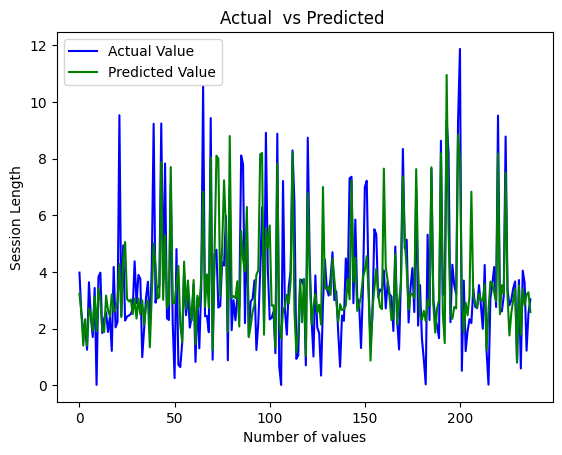

In [267]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [268]:
#Training Scores
training_data_prediction = regressor.predict(X_train)

In [269]:
mean_absolute_error(Y_train, training_data_prediction)

0.47052458162441607

In [270]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.7246802018187033

In [271]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8953957367395614


In [272]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [273]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  19.112787336316636


In [274]:
#Test Scores

In [275]:
mean_absolute_error(Y_test, test_data_prediction)

1.0477045836668004

In [276]:
rms = sqrt(mean_squared_error(Y_test, test_data_prediction))

In [277]:
print(rms)

1.507761879146999


In [278]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.5432908545669145


In [279]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [280]:
smape_score = smape(Y_test, test_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  33.720035310762846


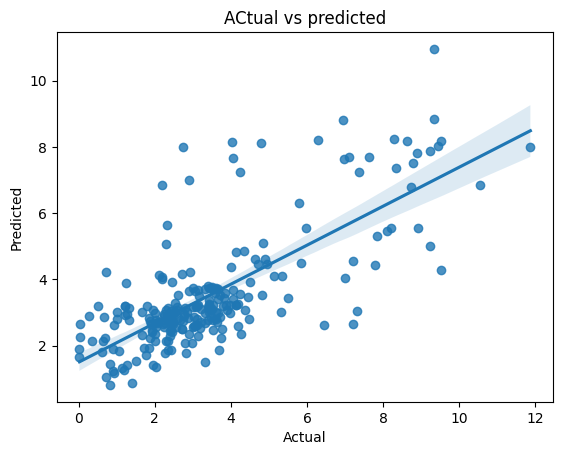

In [281]:
#Visualising
sns.regplot(x=Y_test, y=test_data_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()



#SVM 

In [282]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [283]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr.fit(X_train,Y_train)

SVR(C=10, gamma=0.1)

In [284]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

In [285]:
print(y_pred)

[2.28894578 2.47185435 2.73633448 2.40763253 1.4571502  2.79304229
 2.85833638 2.04949657 3.0238191  1.68991539 3.58045901 3.16866252
 2.41043505 2.1781132  2.73014169 2.67690651 2.98936247 2.09881564
 1.82822108 2.81465553 3.7272054  7.65092929 2.35491703 3.92214808
 4.24703397 3.16688588 3.6793364  3.15942059 3.04632745 2.72904477
 3.25344849 2.54260521 1.43782615 2.78855368 2.10072679 2.60572712
 2.7672084  1.85402722 3.32918369 8.03856248 3.3794308  2.64815424
 3.87052038 8.05529715 2.56758045 6.62861701 2.67586732 2.74321368
 7.55314649 3.18469551 3.11625492 2.03509494 3.10520625 2.10072679
 1.80258818 3.47219367 2.66129099 3.56265058 2.6756782  2.69130365
 3.01759637 2.37670563 2.96076317 2.52011826 2.55479635 8.01603819
 2.81386125 2.96031137 2.96778648 8.53332879 1.43041369 3.27120183
 8.34494092 8.11026558 3.30493939 1.83022147 8.28872519 8.27158745
 2.28201256 8.99056133 3.24732106 3.11975848 3.1795306  2.86575954
 2.93629231 6.70125803 3.69187938 4.20533051 6.25135111 1.9417

In [286]:
Y_test = list(Y_test)

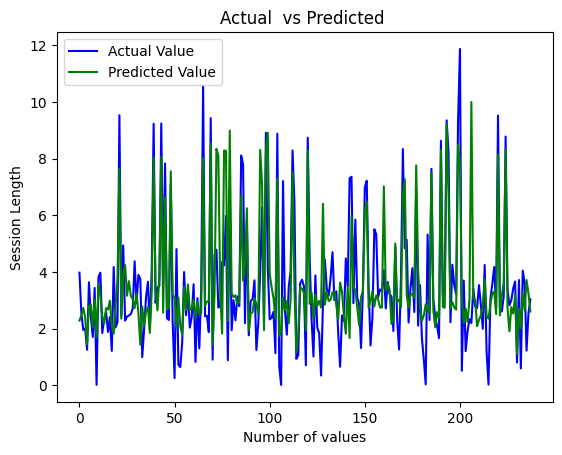

In [287]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [288]:
mean_absolute_error(Y_test, y_pred)

1.1071062969020442

In [289]:
rms = sqrt(mean_squared_error(Y_test, y_pred))

In [290]:
print(rms)

1.549362075319978


In [291]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.5177413421049226


In [292]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score: ", smape_score)

SMAPE score:  36.561884758063314


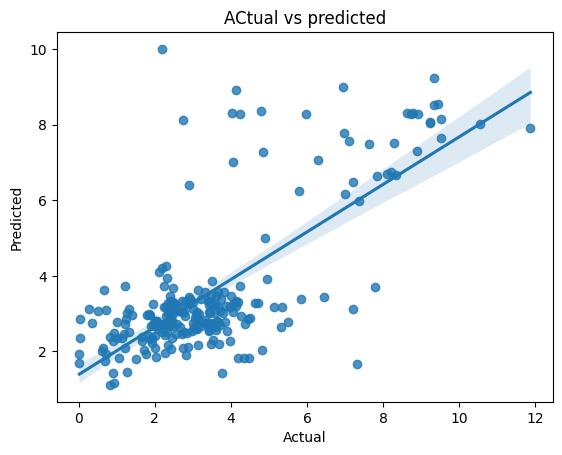

In [293]:
#Visualising
sns.regplot(x=Y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#XGB

In [294]:
# loading the model
xb_model = XGBRegressor(objective='reg:squarederror', alpha=0.5)

In [295]:
# training the model with X_train
xb_model.fit(X_train, Y_train)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [296]:
test_prediction = xb_model.predict(X_test)

In [297]:
print(test_prediction)

[ 2.9869633   3.1194549   1.4201407   2.0466218   1.3937508   2.6898255
  2.8269918   1.8105371   3.0923772   1.9142587   3.482873    2.8872926
  1.9642761   1.8668805   2.908791    2.6654906   2.0578535   4.412146
  1.1793797   2.85079     3.1891077   4.5049057   2.3295715   4.448129
  5.5561695   2.6164286   3.5062356   3.0503495   1.3646213   3.1183736
  1.1048275   3.2151155   2.5884912   3.0652382   2.106154    3.1029248
  3.5641055   1.1007662   3.1346202   3.9843178   3.921854    3.4526443
  3.284286    8.171997    2.84631     5.518       2.288947    2.588934
  7.9738154   2.6566892   2.634858    3.965578    3.3774543   2.106154
  1.9572672   4.635548    2.5784447   3.5242093   3.1392343   1.7991412
  4.2955713   1.0584227   3.2344587   3.0540388   3.5148237   6.8023496
  2.5715501   3.4960039   3.4004872   6.914954    1.9666795   4.745962
  8.048884    9.802983    3.2289042   3.196468    7.7908597   5.7818556
  2.277258    9.216816    3.0955296   3.0463202   2.642372    3.44934

In [298]:
Y_test = list(Y_test)

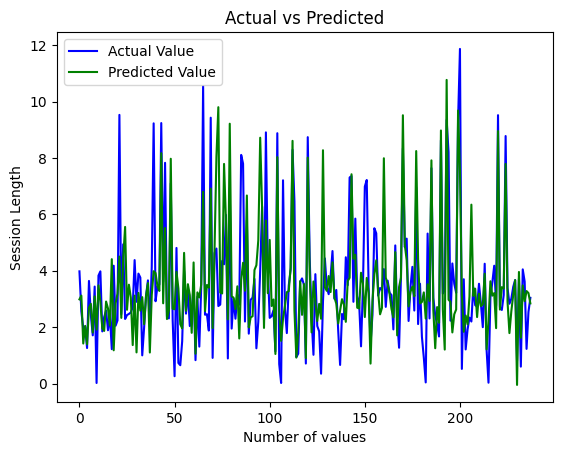

In [299]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [300]:
#Training Scores
training_data_prediction = xb_model.predict(X_train)

In [301]:
mean_absolute_error(Y_train, training_data_prediction)

0.3432989174588246

In [302]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.501913437434292

In [303]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9498218971056649


In [304]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)


SMAPE score:  15.92193831585547


In [305]:
#Test Scores

In [306]:
mean_absolute_error(Y_test, test_prediction)

1.1271864987221085

In [307]:
rms = sqrt(mean_squared_error(Y_test, test_prediction))

In [308]:
print(rms)

1.6772157223588913


In [309]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.4348652140937864


In [310]:
smape_score = smape(Y_test, test_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  37.01614033442535


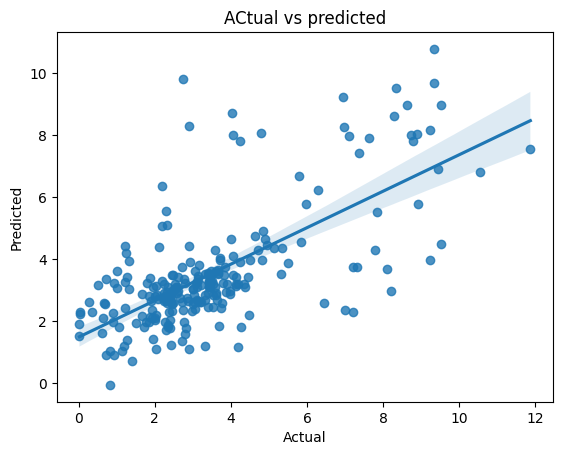

In [311]:
#Visualising
sns.regplot(x=Y_test, y=test_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#ANN

In [312]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [313]:
# layers
model=Sequential()
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
#model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [314]:
# Compile the model
model.compile(loss='mean_absolute_error',optimizer='adam')

In [315]:
# Train the model on the training dataset
model.fit(X_train, Y_train, epochs=1000, verbose=0)

In [316]:
# Use the trained model to make predictions on the test dataset
Y_pred = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [317]:
print(Y_pred)

[[ 1.3409573 ]
 [ 2.2621355 ]
 [ 3.0893562 ]
 [ 2.7477787 ]
 [ 2.3688405 ]
 [ 3.48687   ]
 [ 3.846988  ]
 [ 1.8318517 ]
 [ 2.797057  ]
 [ 1.6130493 ]
 [ 3.2663007 ]
 [ 3.6371298 ]
 [ 2.9032662 ]
 [ 2.7946765 ]
 [ 2.7562    ]
 [ 3.8960307 ]
 [ 2.5319707 ]
 [ 1.8880101 ]
 [ 2.0620549 ]
 [ 2.9671495 ]
 [ 4.354552  ]
 [ 4.9396133 ]
 [ 2.6185234 ]
 [ 4.593117  ]
 [ 3.7524161 ]
 [ 2.875291  ]
 [ 3.1257207 ]
 [ 2.9528453 ]
 [ 2.8756192 ]
 [ 2.6992674 ]
 [ 3.0462837 ]
 [ 2.5875025 ]
 [ 1.027095  ]
 [ 3.286888  ]
 [ 2.7100513 ]
 [ 2.241404  ]
 [ 2.972154  ]
 [ 1.9122266 ]
 [ 2.8098297 ]
 [ 5.0510635 ]
 [ 3.2279289 ]
 [ 1.8426732 ]
 [ 3.96366   ]
 [ 8.625824  ]
 [ 3.0576468 ]
 [ 4.834942  ]
 [ 2.6709917 ]
 [ 3.4501545 ]
 [ 7.1546626 ]
 [ 3.0562918 ]
 [ 3.5445187 ]
 [ 2.7021158 ]
 [ 3.316922  ]
 [ 2.7100513 ]
 [ 2.5815308 ]
 [ 4.2118077 ]
 [ 2.5095656 ]
 [ 3.2945468 ]
 [ 2.7187426 ]
 [ 2.681382  ]
 [ 3.4418461 ]
 [ 2.006131  ]
 [ 3.3060844 ]
 [ 2.5754244 ]
 [ 2.6551757 ]
 [ 5.1041303 ]
 [ 2.83094

In [318]:
#Training Scores
training_data_prediction = model.predict(X_train)

30/30 [==============================] - 0s 2ms/step


In [319]:
mean_absolute_error(Y_train, training_data_prediction)

1.04227964515315

In [320]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.6659081265104194

In [321]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.44721189999747024


In [322]:
mean_absolute_error(Y_test, Y_pred)

1.1545699974468777

In [323]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [324]:
print(rms)

1.6527758517700633


In [325]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.4512151565017477


In [326]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return np.mean((np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 2) * 100

In [327]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 36.561884758063314


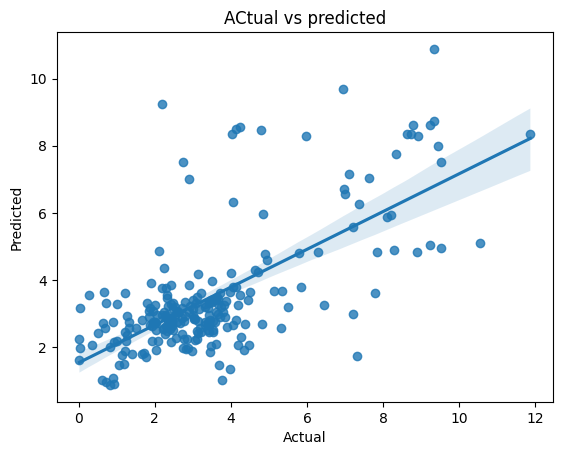

In [328]:
#Visualising
sns.regplot(x=Y_test, y=Y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#KNN

In [329]:
from sklearn.neighbors import KNeighborsRegressor

In [330]:
k = 6
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

In [331]:
#Train Scores
training_data_prediction = knn.predict(X_train)

In [332]:
mean_absolute_error(Y_train, training_data_prediction)

0.9979880827199439

In [333]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.497024472119616

In [334]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.5536100672184254


In [335]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 34.00070619869468


In [336]:
#test Scores
mean_absolute_error(Y_test, knn_pred)

1.1246008403361345

In [337]:
sqrt(mean_squared_error(Y_test, knn_pred))

1.552071418655977

In [338]:
# R squared error
error_score = metrics.r2_score(Y_test, knn_pred)
print("R squared error : ", error_score)

R squared error :  0.51605323224311


In [339]:
smape_score = smape(Y_test, knn_pred)
print("SMAPE score:", smape_score)

SMAPE score: 36.75934801395791


In [340]:
from sklearn.ensemble import AdaBoostRegressor

In [341]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
adaboost = AdaBoostRegressor(estimator=knn, n_estimators=50, learning_rate=0.1)
adaboost.fit(X_train, Y_train)
ada_pred = adaboost.predict(X_test)

In [342]:
#Train Scores
training_data_prediction = adaboost.predict(X_train)

In [343]:
mean_absolute_error(Y_train, training_data_prediction)

0.8759558359621451

In [344]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.1596682490908885

In [345]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7321299707443064


In [346]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 31.751326970702443


In [347]:
#Test Scores
mean_absolute_error(Y_test, ada_pred)

1.160050420168067

In [348]:
sqrt(mean_squared_error(Y_test, ada_pred))

1.6486535377073492

In [349]:
# R squared error
error_score = metrics.r2_score(Y_test, ada_pred)
print("R squared error : ", error_score)

R squared error :  0.4539492746624948


In [350]:
smape_score = smape(Y_test, ada_pred)
print("SMAPE score:", smape_score)

SMAPE score: 37.0948813091921


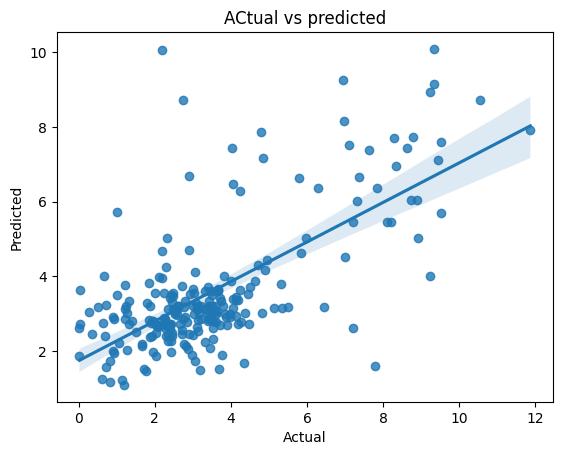

In [351]:
#Visualising
sns.regplot(x=Y_test, y=ada_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

# Ensemble Learning

In [352]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('svm', SVR(C=10, gamma=0.1))])

In [353]:
pred=stack_regressor.predict(X_test)

In [354]:
print(pred)

[2.72633191 2.60544607 2.47406031 2.54464103 1.7479699  2.90536198
 2.87430249 2.24503787 3.10659764 2.02811057 3.48352702 3.10272032
 2.42467617 2.28238239 2.94321209 2.72057965 2.85316202 2.53027332
 2.24926324 2.82460682 3.43974185 5.97250556 2.52478557 4.06357889
 4.30208274 3.15241338 3.48371425 3.14930556 2.9000206  2.89771494
 2.96718928 2.84300883 1.99810718 2.95099575 2.36528048 2.79497177
 3.0050199  1.98165189 3.31624404 6.27453307 3.6097708  2.91265946
 3.4980875  7.08618302 2.80596899 5.57560443 2.80263137 2.88067114
 6.88239661 3.08292665 3.13601578 2.74152825 3.41716519 2.36528048
 2.05569427 3.71227663 2.80686354 3.5566399  2.81502493 2.65118078
 3.3422972  2.25446817 3.09075829 2.78779125 2.99108082 6.91768022
 2.88625554 3.3185651  3.02657825 7.53344087 1.74443184 3.67157893
 7.54649772 7.41671615 3.2578434  2.95256718 7.11369157 6.74094751
 2.40995865 8.09895093 3.21014258 3.15474423 3.19080454 3.16550645
 2.791106   5.66732057 3.79262575 4.00465804 5.78046713 2.1173

In [355]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [356]:
mean_absolute_error(Y_train, training_data_prediction)

0.8887664657271578

In [357]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.3235166844140291

In [358]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.6510883804275138


In [359]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 31.20596224024522


In [360]:
#Test Scores
mean_absolute_error(Y_test, pred)

1.101376341170307

In [361]:
rms = sqrt(mean_squared_error(Y_test, pred))

In [362]:
print(rms)

1.4930719784256534


In [363]:
# R squared error
error_score = metrics.r2_score(Y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.5521468014402603


In [364]:
smape_score = smape(Y_test, pred)
print("SMAPE score:", smape_score)

SMAPE score: 35.86690043402817


In [365]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('knn',knn),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('knn', KNeighborsRegressor()),
                              ('svm', SVR(C=10, gamma=0.1))])

In [366]:
predict_ed = stack_regressor.predict(X_test)

In [367]:
print(predict_ed)

[2.72865263 2.68430517 2.44276183 2.56574822 1.75942311 2.85326593
 2.81507161 2.22552318 3.13150982 2.02477844 3.57928622 3.04645743
 2.52480776 2.32648117 2.95713372 2.73748094 2.90944313 2.46517613
 2.34661357 2.82380125 3.46407722 5.90648537 2.5164729  4.02138481
 4.29290996 3.04448689 3.43998687 3.12957912 2.88247767 2.89114702
 2.9513702  2.79780413 1.9642613  3.01681965 2.36518979 2.78921518
 2.97606699 1.96292774 3.33361669 6.51422948 3.5508918  2.80043305
 3.49729539 7.40040813 2.77207398 5.72600622 2.78136797 2.85511146
 6.97098544 3.09905449 3.05653856 2.63526949 3.4884284  2.36518979
 2.08342841 3.70179923 2.82684545 3.56645445 2.77393633 2.67313493
 3.25128608 2.10984563 3.09548257 2.7972855  3.00828966 7.10238301
 2.85785952 3.24042744 2.9798774  7.50301112 1.80124363 3.65655463
 7.50736862 7.32106718 3.2803627  2.52732889 7.09024247 6.69445069
 2.50728973 8.17957805 3.15738192 3.15134276 3.07492833 3.19768922
 2.77681246 5.73725512 3.3500714  4.11903744 5.6993732  2.0035

In [368]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [369]:
mean_absolute_error(Y_train, training_data_prediction)

0.9025732067189346

In [370]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.3459702051227564

In [371]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.6391493562386007


In [372]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 31.540527397160385


In [373]:
#Test Scores
mean_absolute_error(Y_test, predict_ed)

1.101519524173037

In [374]:
sqrt(mean_squared_error(Y_test, predict_ed))

1.4902635061726326

In [375]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_ed)
print("R squared error : ", error_score)

R squared error :  0.5538300429087712


In [376]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 35.966896387891495


In [377]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('svm', SVR(C=10, gamma=0.1))])

In [378]:
predict = vote_regressor.predict(X_test)

In [379]:
print(predict)

[2.72037289 2.51141551 2.10911724 2.35546627 1.42341593 2.66714615
 2.67613902 2.02634829 3.08351328 1.85886436 3.5419795  3.08541983
 2.14227669 2.01734993 2.96348424 2.61954075 2.64998123 2.51943282
 1.95371054 2.79447056 3.23416936 5.89076465 2.38733018 4.28442404
 4.60521698 3.01819877 3.32909106 3.08109379 2.78666373 2.86727477
 2.82196174 2.86914641 1.88588808 2.91890184 2.1273084  2.69946356
 2.94329587 1.64673195 3.27754185 6.86058124 3.7856654  2.98779295
 3.37324019 8.19704857 2.74879023 6.0829085  2.69363366 2.82435684
 7.71357325 2.97844776 2.99099603 2.68584747 3.56605312 2.1273084
 1.70416409 3.93264933 2.74414549 3.64105196 2.69444744 2.47115182
 3.42154819 1.88907282 3.09833159 2.71165496 3.10529817 7.3582691
 2.79711813 3.44553426 2.92629324 8.2888144  1.51390684 3.97849258
 8.11842046 8.14778279 3.17302969 2.94846073 7.95951259 7.09074372
 2.05787711 9.12548066 3.17371053 3.11322924 3.06047613 3.24117977
 2.56579532 6.04472901 3.84603969 4.13096526 6.40132556 1.827234

In [380]:
#Train Scores
training_data_prediction = vote_regressor.predict(X_train)

In [381]:
mean_absolute_error(Y_train, training_data_prediction)

0.7207228779335916

In [382]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.124916331374545

In [383]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7479440025653828


In [384]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 35.966896387891495


In [385]:
#Test Scores
mean_absolute_error(Y_test, predict)

1.065268373642233

In [386]:
rms = sqrt(mean_squared_error(Y_test, predict))

In [387]:
print(rms)

1.4990443034070113


In [388]:
# R squared error
error_score = metrics.r2_score(Y_test, predict)
print("R squared error : ", error_score)

R squared error :  0.5485567878744593


In [389]:
smape_score = smape(Y_test, predict)
print("SMAPE score:", smape_score)

SMAPE score: 34.794411640879666


In [390]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor),('knn',knn),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('knn', KNeighborsRegressor()),
                            ('svm', SVR(C=10, gamma=0.1))])

In [391]:
predict_ = vote_regressor.predict(X_test)

In [392]:
print(predict_)

[2.83307717 2.82189113 2.12707816 2.49014418 1.57180673 2.75274743
 2.66769824 2.02669886 3.17978553 1.73938687 3.71271967 2.93081041
 2.59076311 2.24202329 2.97130596 2.6545355  2.66608749 2.48498855
 2.52764036 2.68582253 3.37094291 5.8050431  2.40388441 4.36928269
 4.54774466 2.90052418 3.29669547 3.03335409 2.60450637 2.8397577
 2.64636894 2.77265942 1.89109483 3.19718456 2.37840893 2.77477571
 3.0015278  1.71850907 3.3550279  6.84828749 3.6120436  2.49855935
 3.43158679 8.16919905 2.73146015 6.25350567 2.67625577 2.67223789
 7.73194883 3.0391985  2.99252247 2.8936872  3.57648542 2.37840893
 2.00882939 3.91883122 2.77893033 3.69526686 2.6865594  2.52123455
 3.33862101 1.63091299 3.13838772 2.79218164 3.10003212 7.99404606
 2.69220708 3.3302349  3.14050383 8.0883096  1.68572123 3.95073394
 8.11868031 7.96828853 3.26635122 2.89144049 7.16497506 6.66179582
 2.40083085 9.15805378 2.99923416 3.12198616 3.00048909 3.42518651
 2.64432521 6.29911934 2.73982646 4.5061435  6.03432815 1.58603

In [393]:
#Train Scores
training_data_prediction = vote_regressor.predict(X_train)

In [394]:
mean_absolute_error(Y_train, training_data_prediction)

0.7814017923640528

In [395]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.2014143026417285

In [396]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7124971279306574


In [397]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 35.966896387891495


In [398]:
#Test scores
mean_absolute_error(Y_test, predict_)

1.065685598433159

In [399]:
sqrt(mean_squared_error(Y_test, predict_))

1.479841285675081

In [400]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_)
print("R squared error : ", error_score)

R squared error :  0.5600488376147237


In [401]:
smape_score = smape(Y_test, predict_)
print("SMAPE score:", smape_score)

SMAPE score: 34.98267364433782
